In [9]:
import math
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from dython import nominal
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("Fuel.csv")
print("The shape of given dataset is ", df.shape)

The shape of given dataset is  (946, 15)


In [3]:
df.head(3)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
df.drop(columns="Model Year", inplace=True)
df.var()

C:\Users\Sundas.Mohsin\AppData\Local\Temp\ipykernel_6952\2200094251.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Engine Size(L)                          1.890115
Cylinders                               3.735213
Fuel Consumption (City (L/100 km)      11.916604
Fuel Consumption(Hwy (L/100 km))        5.221796
Fuel Consumption(Comb (L/100 km))       8.272964
Fuel Consumption(Comb (mpg))           59.062559
CO2 Emissions(g/km)                  4152.919486
CO2 Rating                              2.166193
Smog Rating                             2.821868
dtype: float64

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
col_names = ["Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2", "Smog"]
df.columns = col_names

df.columns

Index(['Make', 'Model', 'Vehicle', 'Engine', 'Cylinders', 'Transmission',
       'Fuel', 'FC_City', 'FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg', 'Emission',
       'CO2', 'Smog'],
      dtype='object')

In [8]:
df.head()

,Make,Model,Vehicle,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,Emission,CO2,Smog
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


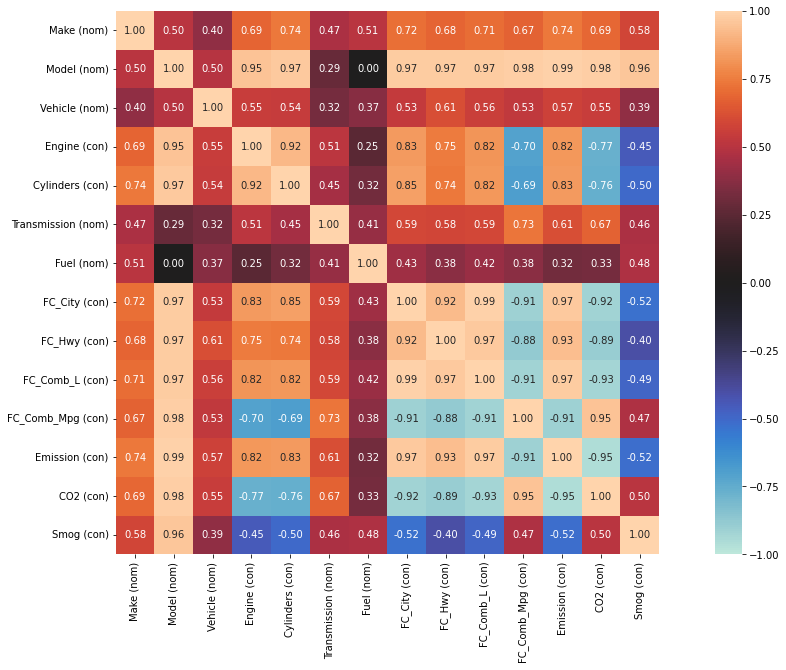

{'corr':                     Make (nom)  Model (nom)  Vehicle (nom)  Engine (con)  \
 Make (nom)            1.000000     0.504664       0.395729      0.685314   
 Model (nom)           0.504664     1.000000       0.497849      0.949372   
 Vehicle (nom)         0.395729     0.497849       1.000000      0.551342   
 Engine (con)          0.685314     0.949372       0.551342      1.000000   
 Cylinders (con)       0.739028     0.965738       0.539647      0.920698   
 Transmission (nom)    0.467239     0.285610       0.324720      0.512352   
 Fuel (nom)            0.506788     0.000000       0.368489      0.245734   
 FC_City (con)         0.716374     0.970309       0.532771      0.834925   
 FC_Hwy (con)          0.684938     0.971980       0.610919      0.749374   
 FC_Comb_L (con)       0.710376     0.971013       0.561426      0.818694   
 FC_Comb_Mpg (con)     0.674196     0.983730       0.526425     -0.704163   
 Emission (con)        0.735230     0.985880       0.567502      0.8

In [10]:
nominal.associations(df, figsize = (20,10), mark_columns=True)

In [11]:
sample_df = pd.get_dummies(df,columns=["Make", "Model", "Vehicle", "Transmission", "Fuel"])
sample_df.head()

,Engine,Cylinders,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,Emission,CO2,Smog,Make_Acura,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1,...,0,0,0,0,0,0,0,0,0,1
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,4,11.3,9.1,10.3,27,242,5,6,1,...,0,0,0,0,0,0,0,0,0,1
4,2.0,4,11.2,8.0,9.8,29,230,5,7,1,...,0,0,0,0,0,0,0,0,0,1


In [12]:
X = sample_df.drop(['Smog'], axis=1).values
Y = sample_df['Smog'].values
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size = 0.3, random_state = 0)

DECISION TREE CLASSIFIER

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
pred_dt = decision_tree.predict(X_test)


print("Recall score: %.3f" % recall_score(Y_test, pred_dt,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(Y_test, pred_dt,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(Y_test, pred_dt,average='weighted',zero_division=1))

Recall score: 0.782
F1 score: 0.782
Precision Score: 0.783


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


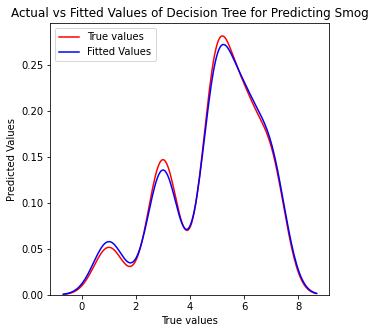

In [14]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(Y_test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred_dt, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values of Decision Tree for Predicting Smog")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()

SUPPORT VECTOR CLASSIFIER

In [15]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn import metrics

sv = SVC(kernel="linear")
sv.fit(X_train, Y_train)

pred_sv = sv.predict(X_test)

print("Recall score: %.3f" % recall_score(Y_test, pred_sv,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(Y_test, pred_sv,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(Y_test, pred_sv,average='weighted',zero_division=1))

Recall score: 0.782
F1 score: 0.781
Precision Score: 0.788


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


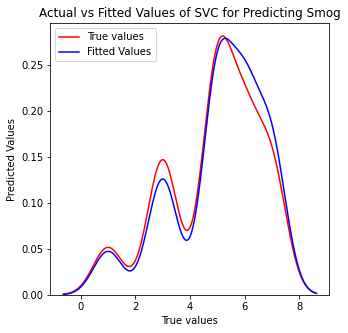

In [18]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(Y_test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred_sv, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values of SVC for Predicting Smog")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()